In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc

In [3]:
df=pd.read_csv(r"C:\Users\LENOVO\Downloads\Datasets\Datasets\Superstore Sales Dataset.csv")

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [13]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

# Data Cleaning

In [125]:
if df.duplicated().sum()>0:
    print('Duplicates are present')
else:
    print('No duplicates')

No duplicates


In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [19]:
df['Year']=df['Order Date'].dt.year

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [23]:
burlington_data = df[df['City'] == 'Burlington'][['City', 'State', 'Postal Code']]
print(burlington_data)

            City           State  Postal Code
683   Burlington  North Carolina      27217.0
684   Burlington  North Carolina      27217.0
1008  Burlington            Iowa      52601.0
1038  Burlington  North Carolina      27217.0
1039  Burlington  North Carolina      27217.0
1393  Burlington  North Carolina      27217.0
2234  Burlington         Vermont          NaN
2928  Burlington  North Carolina      27217.0
5065  Burlington  North Carolina      27217.0
5066  Burlington  North Carolina      27217.0
5274  Burlington         Vermont          NaN
8317  Burlington  North Carolina      27217.0
8318  Burlington  North Carolina      27217.0
8410  Burlington  North Carolina      27217.0
8798  Burlington         Vermont          NaN
9146  Burlington         Vermont          NaN
9147  Burlington         Vermont          NaN
9148  Burlington         Vermont          NaN
9209  Burlington            Iowa      52601.0
9210  Burlington            Iowa      52601.0
9386  Burlington         Vermont  

In [25]:
burlington_mode = df[df['City'] == 'Burlington']['Postal Code'].mode()[0]
df.loc[(df['City'] == 'Burlington') & (df['State'] == 'Vermont'), 'Postal Code'] = burlington_mode

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

# EDA

In [42]:
df.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year
count,9800.000000,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800.000000,9800,9800,9800,9800,9800,9800.000000,9800.000000
unique,NaN,4922,NaN,NaN,4,793,793,3,1,529,49,NaN,4,1861,3,17,1849,NaN,NaN
top,NaN,CA-2018-100111,NaN,NaN,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN
freq,NaN,14,NaN,NaN,5859,35,35,5101,9800,891,1946,NaN,3140,19,5909,1492,47,NaN,NaN
mean,4900.500000,NaN,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55241.830612,NaN,NaN,NaN,NaN,NaN,230.769059,2016.724184
min,1.000000,NaN,2015-01-03 00:00:00,2015-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,2015.000000
25%,2450.750000,NaN,2016-05-24 00:00:00,2016-05-27 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.248000,2016.000000
50%,4900.500000,NaN,2017-06-26 00:00:00,2017-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57551.000000,NaN,NaN,NaN,NaN,NaN,54.490000,2017.000000
75%,7350.250000,NaN,2018-05-15 00:00:00,2018-05-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,210.605000,2018.000000
max,9800.000000,NaN,2018-12-30 00:00:00,2019-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99301.000000,NaN,NaN,NaN,NaN,NaN,22638.480000,2018.000000


In [29]:
q1=df['Sales'].quantile(0.25)
q3=df['Sales'].quantile(0.75)
print(q1)
print(q3)
IQR= q3-q1
lower_bound = q1 -1.5*IQR
upper_bound = q3 +1.5*IQR
Outliers= df[(df['Sales'] <lower_bound) | (df['Sales']>upper_bound)] 
Outliers

17.248
210.60500000000002


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016
7,8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,2015
10,11,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,2015
11,12,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.4240,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9759,9760,CA-2017-146913,2017-10-31,2017-11-05,Standard Class,SF-20965,Sylvia Foulston,Corporate,United States,San Francisco,California,94109.0,West,FUR-CH-10001854,Furniture,Chairs,Office Star - Professional Matrix Back Chair w...,1403.9200,2017
9774,9775,CA-2015-169019,2015-07-26,2015-07-30,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,Texas,78207.0,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.5840,2015
9781,9782,CA-2017-153178,2017-09-14,2017-09-18,Standard Class,CL-12565,Clay Ludtke,Consumer,United States,Long Beach,New York,11561.0,East,OFF-BI-10004390,Office Supplies,Binders,GBC DocuBind 200 Manual Binding Machine,673.5680,2017
9787,9788,CA-2018-144491,2018-03-27,2018-04-01,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-BO-10001811,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",1023.3320,2018


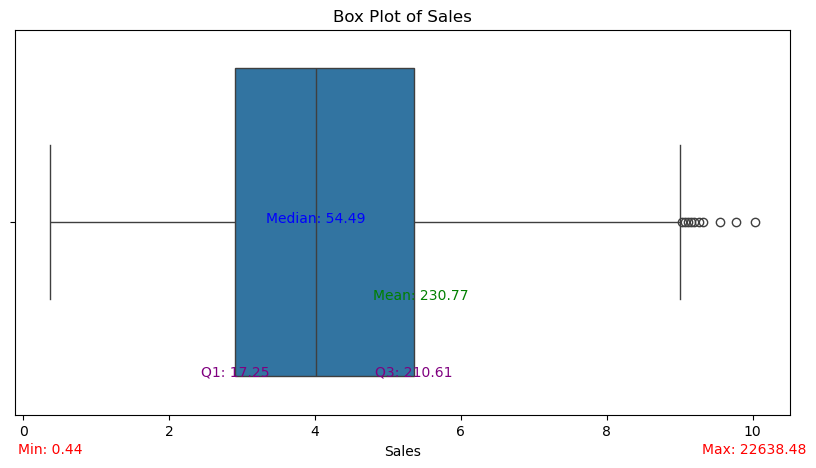

In [31]:
# Calculate the log-transformed values of Sales
log_sales = np.log1p(df["Sales"])

# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=log_sales)

# Add title and labels
plt.title("Box Plot of Sales")
#plt.xlabel("Log Sales")
#plt.ylabel("Frequency")

# Calculate the necessary statistics
min_val = np.min(df["Sales"])
max_val = np.max(df["Sales"])
q1 = df['Sales'].quantile(0.25)  
q3 = df['Sales'].quantile(0.75)  
mean_val = np.mean(df["Sales"])
median_val = np.median(df["Sales"])


plt.text(np.log1p(mean_val), 0.2, f'Mean: {mean_val:.2f}', horizontalalignment='center', color='green')
plt.text(np.log1p(median_val), 0, f'Median: {median_val:.2f}', horizontalalignment='center', color='blue')
plt.text(np.log1p(min_val), 0.6, f'Min: {min_val:.2f}', horizontalalignment='center', color='red')
plt.text(np.log1p(max_val), 0.6, f'Max: {max_val:.2f}', horizontalalignment='center', color='red')
plt.text(np.log1p(q1), 0.4, f'Q1: {q1:.2f}', horizontalalignment='center', color='purple')
plt.text(np.log1p(q3), 0.4, f'Q3: {q3:.2f}', horizontalalignment='center', color='purple')

plt.show()

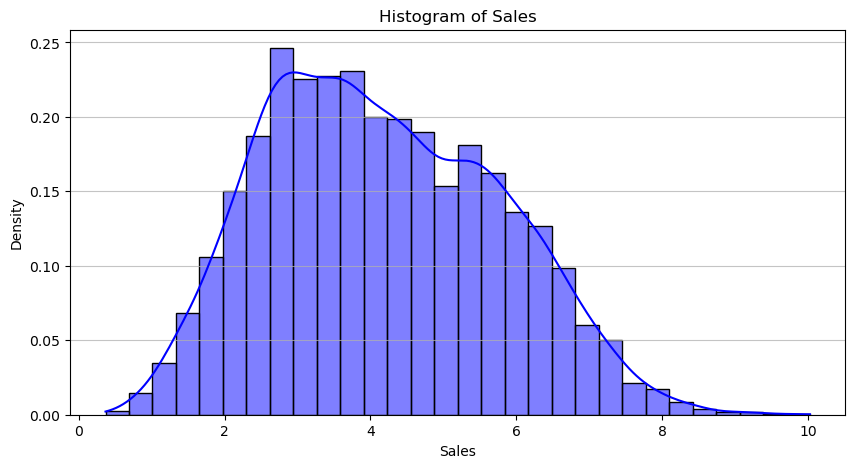

In [33]:
# Create a histogram of Sales
plt.figure(figsize=(10, 5))
#plt.hist(df['Sales'], bins=30, color='blue', edgecolor='black')  # Adjust bins as needed
sns.histplot(np.log1p(df['Sales']), bins=30, color='blue', kde=True, stat='density', alpha=0.5)
plt.title('Histogram of Sales')
#plt.xlabel('Sales Amount')
#plt.ylabel('Sales')
plt.grid(axis='y', alpha=0.75)  # Add gridlines for better readability
plt.show()

#### Product Categories Contribution to Overall Sales

In [44]:
Sales_by_Category= df.groupby('Category')['Sales'].sum().reset_index()
print(Sales_by_Category)

          Category        Sales
0        Furniture  728658.5757
1  Office Supplies  705422.3340
2       Technology  827455.8730


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12184\2075487591.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Sales_by_Category, x='Category',y='Sales',palette='viridis')


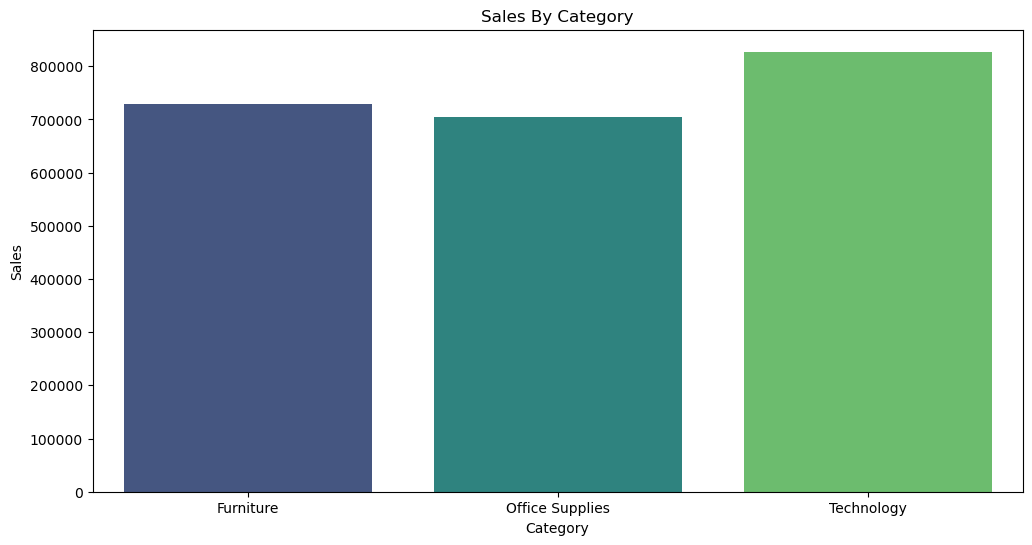

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(data=Sales_by_Category, x='Category',y='Sales',palette='viridis')
plt.title('Sales By Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

#### Overall Sales Performance Across Different Regions

In [63]:
Sales_by_Regions= df.groupby('Region')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
print(Sales_by_Regions)

    Region        Sales
3     West  710219.6845
1     East  669518.7260
0  Central  492646.9132
2    South  389151.4590


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12184\2691577638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Sales_by_Regions, x='Region',y='Sales',palette='viridis')


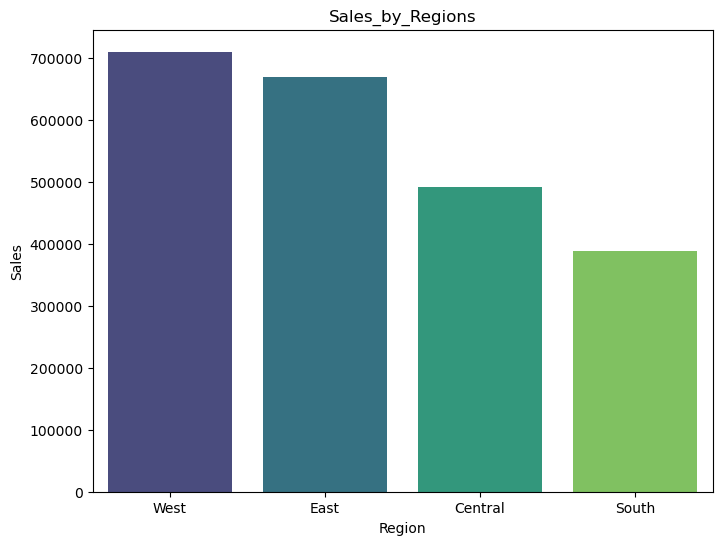

In [65]:
plt.figure(figsize=(8,6))
sns.barplot(data=Sales_by_Regions, x='Region',y='Sales',palette='viridis')
plt.title('Sales_by_Regions')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

#### Customer Segments Purchasing Behavior

In [85]:
Sales_by_Segment = df.groupby('Segment')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
print(Segment_sales)

       Segment         Sales
0     Consumer  1.148061e+06
1    Corporate  6.884941e+05
2  Home Office  4.249822e+05


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12184\220613129.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Sales_by_Segment, x='Segment',y='Sales',palette='viridis')


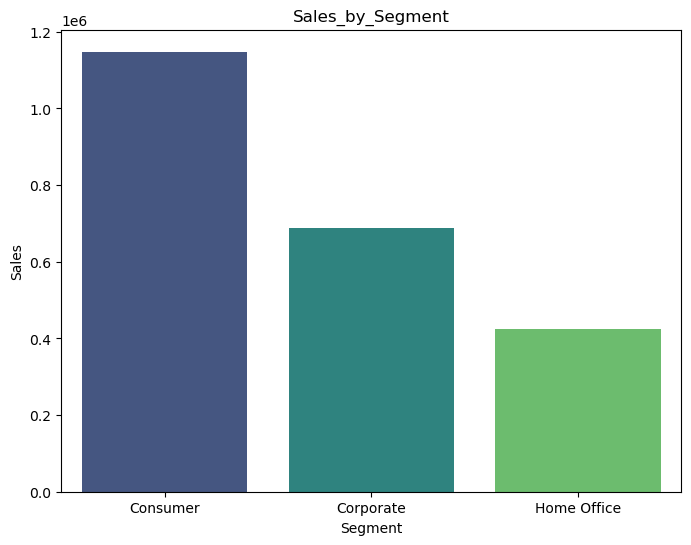

In [87]:
plt.figure(figsize=(8,6))
sns.barplot(data=Sales_by_Segment, x='Segment',y='Sales',palette='viridis')
plt.title('Sales_by_Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()

In [89]:
df['Order Month'] = df['Order Date'].dt.to_period('M')

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [165]:
df['Order Month'] = df['Order Month'].dt.to_timestamp()

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [123]:
desktop_path = 'C:\\Users\\LENOVO\\Desktop\\cleaned_data.csv'
df.to_csv(desktop_path, index=False)
print("DataFrame saved to:",desktop_path)

DataFrame saved to: C:\Users\LENOVO\Desktop\cleaned_data.csv


In [131]:
server ='DESKTOP-EMC15FR\SQLEXPRESS'
database='superstore'

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12184\2666737448.py:1: SyntaxWarning: invalid escape sequence '\S'
  server ='DESKTOP-EMC15FR\SQLEXPRESS'


In [135]:
# Define connection string parameters
server =r'DESKTOP-EMC15FR\SQLEXPRESS'
database = 'superstore' 

In [139]:
# Establish connection
conn = pyodbc.connect(f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;')

In [141]:
cursor=conn.cursor()

In [157]:
cursor.execute('Select * From superstore')

ProgrammingError: ('42S02', "[42S02] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Invalid object name 'superstore'. (208) (SQLExecDirectW)")

In [151]:
cursor.execute("SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE = 'BASE TABLE'")
tables = cursor.fetchall()
for table in tables:
    print(table)


In [167]:
from sqlalchemy import create_engine

# Create connection string (replace with your connection details)
conn_str = r'mssql+pyodbc://DESKTOP-EMC15FR\SQLEXPRESS/superstore?driver=ODBC+Driver+17+for+SQL+Server'

# Create SQLAlchemy engine
engine = create_engine(conn_str)

# Load DataFrame into SQL Server (replace 'table_name' with your desired table name)
df.to_sql('superstore', engine, if_exists='replace', index=False)

24

In [169]:
cursor.execute('Select * From superstore')

In [171]:
server = r'DESKTOP-EMC15FR\SQLEXPRESS'
database = 'superstore'  # Use the correct database name here

conn = pyodbc.connect(f'DRIVER={{ODBC Driver 17 for SQL Server}};'
                      f'SERVER={server};'
                      f'DATABASE={database};'
                      f'Trusted_Connection=yes;')
cursor = conn.cursor()


In [173]:
cursor.execute("SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE = 'BASE TABLE'")
tables = cursor.fetchall()
for table in tables:
    print(table)


('superstore',)


# Shipping Analysis

### 1) How do Shipping Modes affect sales and delivery time?

In [225]:
query = '''
SELECT 
    [Ship Mode] AS ShipMode, 
    AVG(Sales) AS AvgSales, 
    AVG(DATEDIFF(day, [Order Date], [Ship Date])) AS AvgDeliveryTime
FROM 
    superstore
GROUP BY 
    [Ship Mode]
ORDER BY 
    AvgSales DESC;
'''
cursor.execute(query)
rows = cursor.fetchall()
for row in rows:
    print(f"Ship Mode: {row.ShipMode}, Avg Sales: {row.AvgSales}, Avg Delivery Time: {row.AvgDeliveryTime} days")



Ship Mode: Second Class, Avg Sales: 236.54793869610933, Avg Delivery Time: 3 days
Ship Mode: Same Day, Avg Sales: 232.74914312267657, Avg Delivery Time: 0 days
Ship Mode: First Class, Avg Sales: 230.22801952032, Avg Delivery Time: 2 days
Ship Mode: Standard Class, Avg Sales: 228.84985611878858, Avg Delivery Time: 5 days


### 2) Is there a correlation between faster shipping methods and higher sales?

In [233]:
queries = '''
SELECT 
    [Ship Mode] AS ShipMode, 
    SUM(Sales) AS TotalSales,
    AVG(DATEDIFF(day, [Order Date], [Ship Date])) AS AvgDeliveryTime
FROM 
    superstore
GROUP BY 
    [Ship Mode];
'''
cursor.execute(queries)
rows = cursor.fetchall()
for row in rows:
    print(f"Ship Mode: {row.ShipMode}, Total Sales: {row.TotalSales}, Avg Delivery Time: {row.AvgDeliveryTime} days")

Ship Mode: First Class, Total Sales: 345572.25730000035, Avg Delivery Time: 2 days
Ship Mode: Same Day, Total Sales: 125219.03899999999, Avg Delivery Time: 0 days
Ship Mode: Standard Class, Total Sales: 1340831.3069999823, Avg Delivery Time: 5 days
Ship Mode: Second Class, Total Sales: 449914.17939999996, Avg Delivery Time: 3 days
